## Detector model: Kiukas et al. vs PW

In [50]:
from sympy import *
# from sympy.physics.matrices import mdft
# from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

In [51]:
gamma = Symbol('gamma')
t = Symbol('t')
tprime = Symbol('t\'')

In [52]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [53]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [54]:
init_printing ()


In [55]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [56]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [57]:
def K(_gamma):
    return H - I*D(_gamma)

In [58]:
K(gamma)

⎡0    1  ⎤
⎢        ⎥
⎢   -ⅈ⋅γ ⎥
⎢1  ─────⎥
⎣     2  ⎦

In [59]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [60]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return re(abs(psi[0])**2 + abs(psi[1])**2)

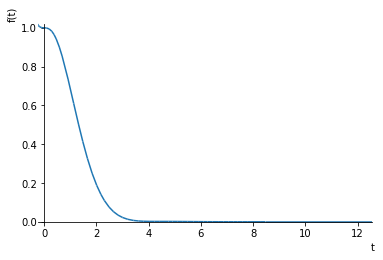

In [61]:
plot(lossy_norm(t),(t, -0.25, 4*pi))

In [62]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [63]:
lossy_norm_n(2)

In [64]:
X = np.linspace(1e-6, 4*np.pi, 500)  # avoid singularity in t=0

In [65]:
Y = lossy_norm_n(X)

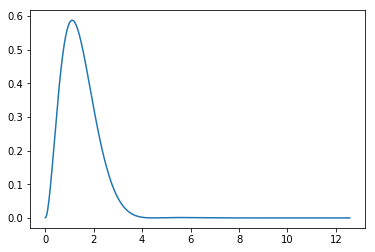

In [66]:
plt.plot(X, -np.gradient(Y, X))

### P-W "expectation value" technique

In [67]:
def U(_t):
    return exp(-I*H*_t)

In [68]:
def psi_unitary(_t):
    psi = U(_t) * Matrix([1,0])
    return psi

In [69]:
psi_unitary(t)

⎡  ⅈ⋅t    -ⅈ⋅t ⎤
⎢ ℯ      ℯ     ⎥
⎢ ──── + ───── ⎥
⎢  2       2   ⎥
⎢              ⎥
⎢   ⅈ⋅t    -ⅈ⋅t⎥
⎢  ℯ      ℯ    ⎥
⎢- ──── + ─────⎥
⎣   2       2  ⎦

In [70]:
psi_unitary(t).dot( D(2*sqrt(2)) * psi_unitary(t) )

In [71]:
D(2*sqrt(2))

⎡0  0 ⎤
⎢     ⎥
⎣0  √2⎦

In [72]:
integrate(sin(t)**2, t)


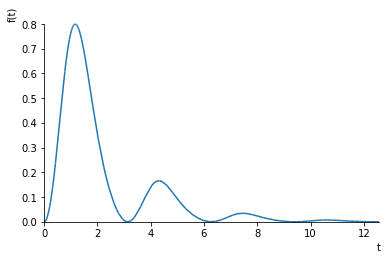

In [73]:
plot(sqrt(2)* sin(t)**2 * exp(sin(t)*cos(t)/2) * exp(-t/2), (t, 0, 4*pi))